In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#create Spark session
spark = SparkSession.builder.appName('YelpReview').getOrCreate()

#change configuration settings on Spark 
conf = spark.sparkContext._conf.setAll([('spark.executor.memory', '5g'), ('spark.app.name', 'Spark Updated Conf'), ('spark.executor.cores', '4'), ('spark.cores.max', '4'), ('spark.driver.memory','8g')])

#print spark configuration settings
#spark.sparkContext.getConf().getAll()

## Read Data

In [3]:
business = spark.read \
    .option("quote", "\"")  \
    .option("escape", "\"") \
    .option("ignoreLeadingWhiteSpace",True) \
    .json("/user/ravim/yelp/yelp_academic_dataset_business.json")

business.printSchema()


root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

In [4]:
review = spark.read \
    .option("quote", "\"")  \
    .option("escape", "\"") \
    .option("ignoreLeadingWhiteSpace",True) \
    .json("/user/ravim/yelp/yelp_academic_dataset_review.json")

review.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)



In [5]:
checkin = spark.read \
    .option("quote", "\"")  \
    .option("escape", "\"") \
    .option("ignoreLeadingWhiteSpace",True) \
    .json("/user/ravim/yelp/yelp_academic_dataset_checkin.json")

checkin.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- date: string (nullable = true)



In [6]:
tip = spark.read \
    .option("quote", "\"")  \
    .option("escape", "\"") \
    .option("ignoreLeadingWhiteSpace",True) \
    .json("/user/ravim/yelp/yelp_academic_dataset_tip.json")
tip.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- compliment_count: long (nullable = true)
 |-- date: string (nullable = true)
 |-- text: string (nullable = true)
 |-- user_id: string (nullable = true)



In [7]:
user = spark.read \
    .option("quote", "\"")  \
    .option("escape", "\"") \
    .option("ignoreLeadingWhiteSpace",True) \
    .json("/user/ravim/yelp/yelp_academic_dataset_user.json" )

user.printSchema()

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)



## User EDA

In [8]:
user.show(4)

+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+-----+--------------------+----+--------------------+-----+-----+------------+------+--------------------+-------------------+
|average_stars|compliment_cool|compliment_cute|compliment_funny|compliment_hot|compliment_list|compliment_more|compliment_note|compliment_photos|compliment_plain|compliment_profile|compliment_writer| cool|               elite|fans|             friends|funny| name|review_count|useful|             user_id|      yelping_since|
+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+-----+--------------------+----+--------------------+-----+-----+------------+------+--------------------+-------------------+
|         3.85|       

In [9]:
from pyspark.sql.types import DateType
from pyspark.sql.types import TimestampType
from pyspark.sql.functions import col, unix_timestamp

user = user.withColumn('yelping_since', unix_timestamp(user['yelping_since'], "yyyy-MM-dd hh:mm:ss").cast("timestamp"))
user = user.withColumn('date', col('yelping_since').cast('date')) 

user.printSchema()

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: timestamp (nullable = true)
 |-- date: date (nullable = true)



In [10]:
user.show(5)

+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+-----+--------------------+----+--------------------+-----+---------+------------+------+--------------------+-------------------+----------+
|average_stars|compliment_cool|compliment_cute|compliment_funny|compliment_hot|compliment_list|compliment_more|compliment_note|compliment_photos|compliment_plain|compliment_profile|compliment_writer| cool|               elite|fans|             friends|funny|     name|review_count|useful|             user_id|      yelping_since|      date|
+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+-----+--------------------+----+--------------------+-----+---------+------------+------+--------------------+---------

In [11]:
from pyspark.sql.functions import * 

df2 =  user.select(
      col("yelping_since"),
      current_date().alias("current_date"),
      datediff(current_date(),col("yelping_since")).alias("datediff")
    )

df2.show(5)

+-------------------+------------+--------+
|      yelping_since|current_date|datediff|
+-------------------+------------+--------+
|               null|  2021-08-22|    null|
|               null|  2021-08-22|    null|
|               null|  2021-08-22|    null|
|               null|  2021-08-22|    null|
|2008-03-03 04:57:05|  2021-08-22|    4920|
+-------------------+------------+--------+
only showing top 5 rows



In [12]:
df2 = df2.filter("datediff IS NOT NULL")


In [13]:
df2 = df2.filter("datediff IS NOT NULL")
df2 = df2.withColumn("yearsDiff",round(months_between(current_date(),col("yelping_since"))/lit(12)))
df2.show(5)

+-------------------+------------+--------+---------+
|      yelping_since|current_date|datediff|yearsDiff|
+-------------------+------------+--------+---------+
|2008-03-03 04:57:05|  2021-08-22|    4920|     13.0|
|2005-07-22 11:07:20|  2021-08-22|    5875|     16.0|
|2009-01-29 03:48:53|  2021-08-22|    4588|     13.0|
|2009-09-30 00:20:56|  2021-08-22|    4344|     12.0|
|2008-04-04 07:33:02|  2021-08-22|    4888|     13.0|
+-------------------+------------+--------+---------+
only showing top 5 rows



In [14]:
from pyspark.sql.functions import mean as _mean, stddev as _stddev, col


df_stats = df2.select(
    _mean(col('yearsDiff')).alias('mean'),
    _stddev(col('yearsDiff')).alias('std')
).collect()

mean = df_stats[0]['mean']
std = df_stats[0]['std']

print(mean)

7.52793330638398


In [15]:
df3 = df2.groupby(['yearsDiff']).count().orderBy(["yearsDiff"], ascending=[1])
pdf3 = df3.toPandas()

<Figure size 1920x1440 with 0 Axes>

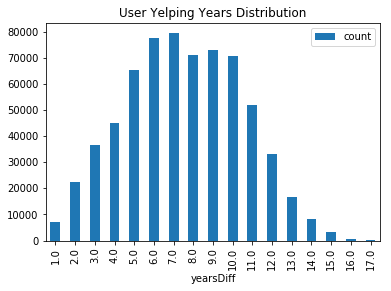

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure

figure(figsize=(24, 18), dpi=80)


pdf3.plot(x='yearsDiff',
        kind='bar',
        stacked=False,
        title='User Yelping Years Distribution')

In [17]:
df4 = user.withColumn(
    'count_category',
    F.when(F.col("review_count").between(0, 0), "no review")\
    .when(F.col('review_count').between(1,10), "less than 10 reviews")\
    .when(F.col('review_count').between(10,100), "less than 100 reviews")\
    .when(F.col('review_count').between(100,100000000), "more than 100 reviews")\
    .otherwise(0)
)

df4 =  df4.filter("count_category IS NOT NULL")
df4.show(5)

+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+-----+--------------------+----+--------------------+-----+---------+------------+------+--------------------+-------------------+----------+--------------------+
|average_stars|compliment_cool|compliment_cute|compliment_funny|compliment_hot|compliment_list|compliment_more|compliment_note|compliment_photos|compliment_plain|compliment_profile|compliment_writer| cool|               elite|fans|             friends|funny|     name|review_count|useful|             user_id|      yelping_since|      date|      count_category|
+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+-----+--------------------+----+--------------------+-----+---------+--------

In [18]:
from pyspark.sql.functions import mean as _mean, stddev as _stddev, col


df_stats = df4.select(
    _mean(col('review_count')).alias('mean')).collect()

mean = df_stats[0]['mean']

print(mean)

21.697721398502004


In [19]:
df4 = df4.groupby(['count_category']).count().orderBy(["count_category"], ascending=[1])
pdf4 = df4.toPandas()

<Figure size 1920x1440 with 0 Axes>

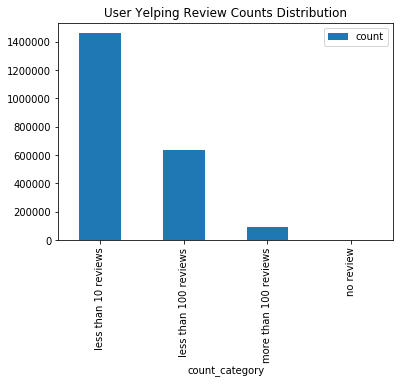

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure

figure(figsize=(24, 18), dpi=80)


pdf4.plot(x='count_category',
        kind='bar',
        stacked=False,
        title='User Yelping Review Counts Distribution')

## Business EDA

In [22]:
from pyspark.sql import SparkSession, Row
from pyspark.sql import functions as F
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark import SparkContext
from pyspark.ml.recommendation import ALS
from pyspark.sql import SQLContext
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql.types import StructType,StructField,IntegerType
%matplotlib inline

In [25]:
# import datasets
df_review = review
df_business = business

In [26]:
#missing values in each column
from pyspark.sql.functions import isnan, when, count, col
df_business.select([count(when(df_business[c].isNull(), c)).alias(c) for c in df_business.columns]).show()

+-------+----------+-----------+----------+----+-----+-------+--------+---------+----+-----------+------------+-----+-----+
|address|attributes|business_id|categories|city|hours|is_open|latitude|longitude|name|postal_code|review_count|stars|state|
+-------+----------+-----------+----------+----+-----+-------+--------+---------+----+-----------+------------+-----+-----+
|      0|     14992|          0|       115|   0|27341|      0|       0|        0|   0|          0|           0|    0|    0|
+-------+----------+-----------+----------+----+-----+-------+--------+---------+----+-----------+------------+-----+-----+



In [27]:
df_review.select([count(when(df_review[c].isNull(), c)).alias(c) for c in df_review.columns]).show()

+-----------+----+----+-----+---------+-----+----+------+-------+
|business_id|cool|date|funny|review_id|stars|text|useful|user_id|
+-----------+----+----+-----+---------+-----+----+------+-------+
|          0|   0|   0|    0|        0|    0|   0|     0|      0|
+-----------+----+----+-----+---------+-----+----+------+-------+



In [28]:
df_buz = df_business.select(['business_id','categories','city','name','review_count','stars','state']) \
                    .withColumnRenamed('stars', 'stars_restaurant')

In [29]:
df_buz = df_buz.dropna()

In [30]:
df_buz.select([count(when(df_buz[c].isNull(), c)).alias(c) for c in df_buz.columns]).show()

+-----------+----------+----+----+------------+----------------+-----+
|business_id|categories|city|name|review_count|stars_restaurant|state|
+-----------+----------+----+----+------------+----------------+-----+
|          0|         0|   0|   0|           0|               0|    0|
+-----------+----------+----+----+------------+----------------+-----+



In [31]:
df_buz.count()

160470

In [32]:
# Top 5 cities with most stores
df_buz.groupby('city').count().orderBy(['count'], ascending=[0]).show(5)

+---------+-----+
|     city|count|
+---------+-----+
|   Austin|22399|
| Portland|18187|
|Vancouver|13325|
|  Atlanta|12607|
|  Orlando|10635|
+---------+-----+
only showing top 5 rows



In [33]:
# Top 5 states with most stores
df_buz.groupby('state').count().orderBy(['count'], ascending=[0]).show(5)

+-----+-----+
|state|count|
+-----+-----+
|   MA|35973|
|   OR|25151|
|   TX|24464|
|   FL|21900|
|   GA|18079|
+-----+-----+
only showing top 5 rows



In [34]:
# Top 5 categories with most stores
df_buz.groupby('categories').count().orderBy(['count'], ascending=[0]).show(5)

+--------------------+-----+
|          categories|count|
+--------------------+-----+
|Beauty & Spas, Ha...|  757|
|  Restaurants, Pizza|  748|
|Hair Salons, Beau...|  742|
|  Pizza, Restaurants|  740|
|Beauty & Spas, Na...|  734|
+--------------------+-----+
only showing top 5 rows



In [35]:
# only use categories including restaurants
df_buz1 = df_buz.filter(df_buz.categories.contains('Restaurants'))
df_buz1.count()

50763

## Review EDA

In [36]:
# Filter out restaurants/users that have very few (<10) reviews to restrict sparsity
buz_with_10_ratings_or_more = df_review.groupby('business_id').agg(F.count(df_review.stars).alias('business_count')).filter(col('business_count')>=10)
user_with_10_reviews_or_more = df_review.groupby('user_id').agg(F.count(df_review.stars).alias('user_count')).filter(col('user_count')>=10)

In [37]:
# join dataframes
df_review = df_review.join(df_buz1, on='business_id', how='inner')
df_review = df_review.join(buz_with_10_ratings_or_more, on='business_id', how='inner')
df_review = df_review.join(user_with_10_reviews_or_more, on='user_id', how='inner')

In [38]:
df_review.show(3)

+--------------------+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+----+-----------------+------------+----------------+-----+--------------+----------+
|             user_id|         business_id|cool|               date|funny|           review_id|stars|                text|useful|          categories|city|             name|review_count|stars_restaurant|state|business_count|user_count|
+--------------------+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+----+-----------------+------------+----------------+-----+--------------+----------+
|-0KAIqdO-DhrIXcY9...|k_JMC4M3BJ4X9pC5X...|   0|2017-05-12 20:31:01|    0|4YCnsRewS8iE9drkM...|  3.0|It's a fun place ...|     0|Sports Bars, Beer...|Buda|  Buck's Backyard|         101|             3.0|   TX|           104|        10|
|-0KAIqdO-DhrIXcY9...|OUZIlIytYIiqPj2RF...|   0|2018-04-

In [39]:
df_review.count()

2998633

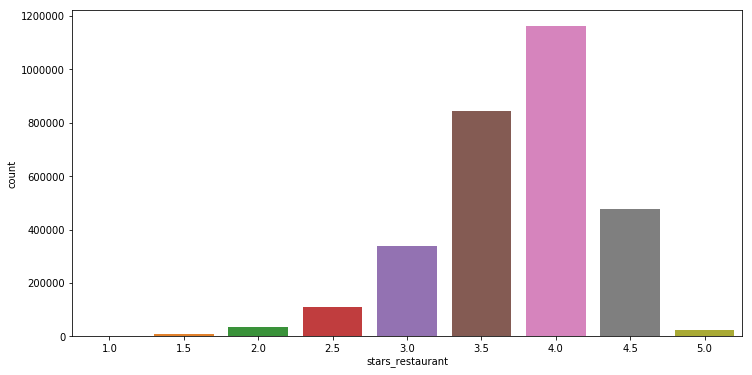

In [40]:
# Restaurant stars distribution
df_pd1 = df_review.groupby(df_review.stars_restaurant).count().orderBy(['stars_restaurant'], ascending=[0]).toPandas()
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='stars_restaurant', y='count', data=df_pd1, ax=ax)

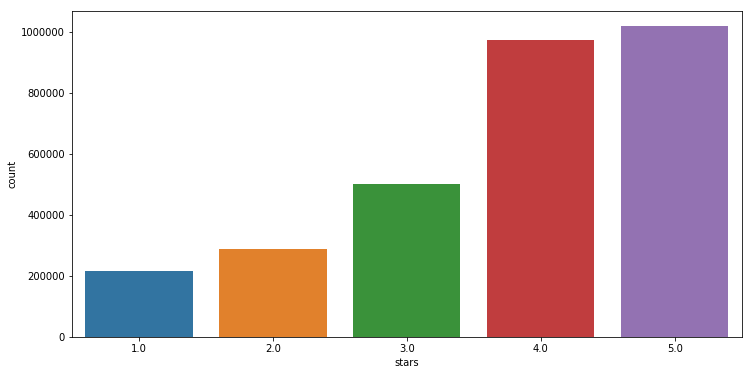

In [41]:
# User review stars distribution
df_pd2 = df_review.groupby(df_review.stars).count().orderBy(['stars'], ascending=[0]).toPandas()
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x='stars', y='count', data=df_pd2, ax=ax)

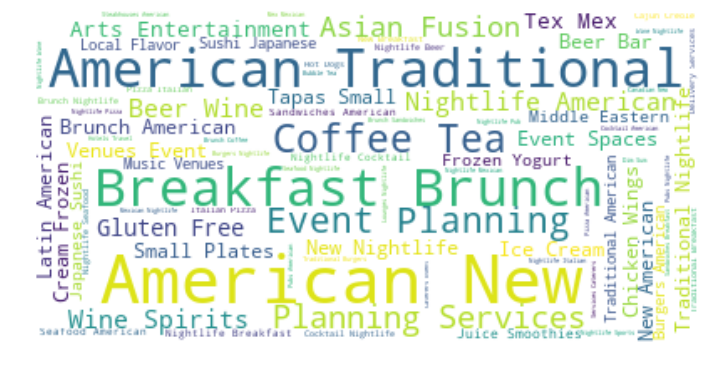

In [42]:
# Popular restaurant wordcloud
restaurant_categories = df_review.select('categories').collect()
restaurant_categories_list = [restaurant_categories[i][0] for i in range(len(restaurant_categories))]
text = " ".join(review for review in restaurant_categories_list)
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = text.replace('Restaurants', "")
text = text.replace('Bars', "")
text = text.replace('Food', "")
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()